## Lesson-02

+ 深度优先与广度优先
+ 爬虫的原理
+ 机器学习的原理

### OOV ? 

### Out of Vocabulary 

### Lambda 

In [1]:
import random

In [24]:
"""adj* => adj* adj | adj null"""

def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

give_adjs = lambda : adj() + adj_star_2()
give_null = lambda : ''
def adj_star_2():
    return random.choice([give_null, give_adjs])()
    #return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star(): # infite loop
    return random.choice(['', adj() + adj_star()])

In [35]:
adj_star_2()

'小小的'

In [36]:
def simple_func(x, y): 
    return x + y

In [13]:
results = []


for e in [1, 3, 5, 7, 9, 10]:
    results.append(operate(e))

In [14]:
results

[-5, -1, 3, 7, 11, 13]

In [17]:
#def operate(e): return e * 2 + 2 - 9

for i in map(lambda x: x * 2 + 2 - 9, [1, 3, 5, 7, 9, 10]): 
    print(i)

-5
-1
3
7
11
13


In [18]:
operator_2 = lambda x: x * 2 + 2 - 9
#def operate(e): return e * 2 + 2 - 9

In [38]:
def absolutly(x): 
    if x < 0: return -1 * x
    else:
        return x

In [40]:
def mod_3(x): return x % 3

In [44]:
mod_3(13)

1

In [45]:
sorted([1, 3, 4, 1, 5, 1, 1, 4, 9, -1, 9, -19, 1], key=mod_3)

[3, 9, 9, 1, 4, 1, 1, 1, 4, 1, 5, -1, -19]

In [46]:
sorted([1, 3, 4, 1, 5, 1, 1, 4, 9, -1, 9, -19, 1], key=lambda x: x % 3)

[3, 9, 9, 1, 4, 1, 1, 1, 4, 1, 5, -1, -19]

## Search Policy 

In [47]:
coordination_source = """
{name:'Lanzhou', geoCoord:[103.73, 36.03]},
{name:'Jiayuguan', geoCoord:[98.17, 39.47]},
{name:'Xining', geoCoord:[101.74, 36.56]},
{name:'Chengdu', geoCoord:[104.06, 30.67]},
{name:'Shijiazhuang', geoCoord:[114.48, 38.03]},
{name:'Lasa', geoCoord:[102.73, 25.04]},
{name:'Guiyang', geoCoord:[106.71, 26.57]},
{name:'Wuhan', geoCoord:[114.31, 30.52]},
{name:'Zhengzhou', geoCoord:[113.65, 34.76]},
{name:'Jinan', geoCoord:[117, 36.65]},
{name:'Nanjing', geoCoord:[118.78, 32.04]},
{name:'Hefei', geoCoord:[117.27, 31.86]},
{name:'Hangzhou', geoCoord:[120.19, 30.26]},
{name:'Nanchang', geoCoord:[115.89, 28.68]},
{name:'Fuzhou', geoCoord:[119.3, 26.08]},
{name:'Guangzhou', geoCoord:[113.23, 23.16]},
{name:'Changsha', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'Shengyang', geoCoord:[123.38, 41.8]},
{name:'Changchun', geoCoord:[125.35, 43.88]},
{name:'Haerbing', geoCoord:[126.63, 45.75]},
{name:'Taiyuan', geoCoord:[112.53, 37.87]},
{name:'Xian', geoCoord:[108.95, 34.27]},
//{name:'Taiwan', geoCoord:[121.30, 25.03]},
{name:'Beijing', geoCoord:[116.46, 39.92]},
{name:'Shanghai', geoCoord:[121.48, 31.22]},
{name:'Chongqing', geoCoord:[106.54, 29.59]},
{name:'Tianjing', geoCoord:[117.2, 39.13]},
{name:'Huhehaote', geoCoord:[111.65, 40.82]},
{name:'Nanning', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'Yingchuan', geoCoord:[106.27, 38.47]},
{name:'Wulumuqi', geoCoord:[87.68, 43.77]},
{name:'Xianggang', geoCoord:[114.17, 22.28]},
{name:'Aomen', geoCoord:[113.54, 22.19]}
"""

In [118]:
geo_pattern = "{name:'(\w+)',\s+geoCoord:\[(\d+\.\d+),\s+(\d+\.\d+)\]}"

In [120]:
city_location = {}

for city, x, y in re.findall(geo_pattern, coordination_source):
    city_location[city] = (float(x), float(y))

In [121]:
city_location

{'Lanzhou': (103.73, 36.03),
 'Jiayuguan': (98.17, 39.47),
 'Xining': (101.74, 36.56),
 'Chengdu': (104.06, 30.67),
 'Shijiazhuang': (114.48, 38.03),
 'Lasa': (102.73, 25.04),
 'Guiyang': (106.71, 26.57),
 'Wuhan': (114.31, 30.52),
 'Zhengzhou': (113.65, 34.76),
 'Nanjing': (118.78, 32.04),
 'Hefei': (117.27, 31.86),
 'Hangzhou': (120.19, 30.26),
 'Nanchang': (115.89, 28.68),
 'Fuzhou': (119.3, 26.08),
 'Guangzhou': (113.23, 23.16),
 '海口': (110.35, 20.02),
 'Shengyang': (123.38, 41.8),
 'Changchun': (125.35, 43.88),
 'Haerbing': (126.63, 45.75),
 'Taiyuan': (112.53, 37.87),
 'Xian': (108.95, 34.27),
 'Taiwan': (121.3, 25.03),
 'Beijing': (116.46, 39.92),
 'Shanghai': (121.48, 31.22),
 'Chongqing': (106.54, 29.59),
 'Tianjing': (117.2, 39.13),
 'Huhehaote': (111.65, 40.82),
 'Nanning': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 'Yingchuan': (106.27, 38.47),
 'Wulumuqi': (87.68, 43.77),
 'Xianggang': (114.17, 22.28),
 'Aomen': (113.54, 22.19)}

In [122]:
cities = {c : [] for c in city_location}

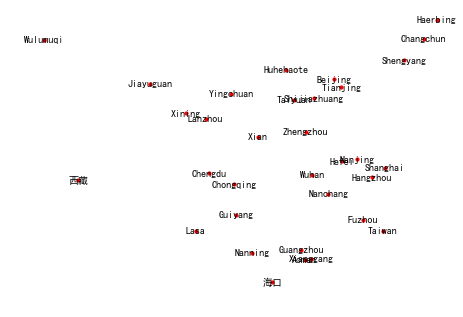

In [133]:
nx.draw(nx.Graph(cities),city_location, with_labels=True, font_size=10, node_size=10)

In [147]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat#纬度-北纬南纬-y, long#经度-东经西经-x)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    #lat1, lon1 = origin
    lon1, lat1 = origin
    
    #lat2, lon2 = destination
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [139]:
city_location['Beijing']

(116.46, 39.92)

In [140]:
city_location['Tianjing']

(117.2, 39.13)

In [142]:
city_location['Shengyang']

(123.38, 41.8)

In [143]:
city_location['Shanghai']

(121.48, 31.22)

In [141]:
geo_distance((116.46, 39.92), (117.2, 39.13))

91.33650798815006

In [144]:
## 平面上: P1: [123.38, 41.8]  P2: [121.48, 31.22]
##  P1: [41.8, 123.38]  P2: [31.22, 121.48]

geo_distance((123.38, 41.8), (121.48, 31.22))

664.4873799505449

In [145]:
geo_distance((41.8, 123.38), (31.22, 121.48))

1188.542685280185

In [150]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])    

In [151]:
get_city_distance('Beijing', 'Shanghai')

1068.1567232158195

In [152]:
get_city_distance('Hangzhou', 'Shanghai')

163.0760821403945

In [158]:
from collections import defaultdict

In [162]:
threshold = 700

#city_connection = {c : [] for c in city_location}
city_connection = defaultdict(list)

for city1 in city_location:
    for city2 in city_location:
        if city1 is city2: continue
        
        distance = get_city_distance(city1, city2)
        
        if distance < threshold:
            city_connection[city1].append(city2)  

In [163]:
city_connection

defaultdict(list,
            {'Lanzhou': ['Jiayuguan',
              'Xining',
              'Chengdu',
              'Xian',
              'Yingchuan'],
             'Jiayuguan': ['Lanzhou', 'Xining'],
             'Xining': ['Lanzhou', 'Jiayuguan', 'Chengdu', 'Yingchuan'],
             'Chengdu': ['Lanzhou',
              'Xining',
              'Lasa',
              'Guiyang',
              'Xian',
              'Chongqing'],
             'Shijiazhuang': ['Zhengzhou',
              'Taiyuan',
              'Xian',
              'Beijing',
              'Tianjing',
              'Huhehaote'],
             'Lasa': ['Chengdu', 'Guiyang', 'Chongqing', 'Nanning'],
             'Guiyang': ['Chengdu', 'Lasa', 'Chongqing', 'Nanning'],
             'Wuhan': ['Zhengzhou',
              'Nanjing',
              'Hefei',
              'Hangzhou',
              'Nanchang',
              'Fuzhou',
              'Xian',
              'Shanghai'],
             'Zhengzhou': ['Shijiazhuang',
       

## 正则表达式

In [66]:
import re

In [69]:
some_text = 'this is a test text, I want some more tests; And I have some tested cases'

In [71]:
'test', 'tests', 'testedededed'

('test', 'tests', 'testedededed')

In [78]:
# + 一个或者多个字符
# * 指的是0个或者多个字符

In [79]:
## re == > regular expresson
pattern = 'test\w*' 
pattern_2 = 'test\w+' 

re.findall(pattern_2, some_text)
#re.findall(pattern, some_text)

['tests', 'tested']

In [88]:
with_numbers_text = """
    电话：18910451234 年龄：32 性别：男 ID：90
    电话：18910451234 年龄：32 性别：男
    电话：18910451234 年龄：32 性别：男
    电话：18910451234 年龄：32 性别：男
    电话：189104513123234 年龄：32 性别：男 ID: 312
    电话：18910451234 年龄：32 性别：男
    电话：18989810451234 年龄：32 性别：男 STU_OD: 312
    电话：01018910451234 年龄：3 性别：男
    电话：18910451234 年龄：32 性别：男
    电话：18910451234 年龄：32 性别：男
    电话：18910451234 年龄：32 性别：男
"""

In [95]:
with_constraint_num_pattern = '电话：(\d+) 年龄：(\d+)' 

In [96]:
re.findall(with_constraint_num_pattern, with_numbers_text)

[('18910451234', '32'),
 ('18910451234', '32'),
 ('18910451234', '32'),
 ('18910451234', '32'),
 ('189104513123234', '32'),
 ('18910451234', '32'),
 ('18989810451234', '32'),
 ('01018910451234', '3'),
 ('18910451234', '32'),
 ('18910451234', '32'),
 ('18910451234', '32')]

In [48]:
import networkx as nx

In [61]:
relatinship = {
    'Zhangsan': [],
    'Li': [],
    'Huang': []
}

In [62]:
simple_graph = nx.Graph(relatinship)

In [63]:
%matplotlib inline

In [64]:
locations = {
    'Zhangsan': (0, 0),
    'Li': (1, 4),
    'Wang': (9, 0),
    'Liu': (19, 1),
    'Gao': (10, 10), 
    'Huang': (11, 19),
    'Hu': (18, -10)
}

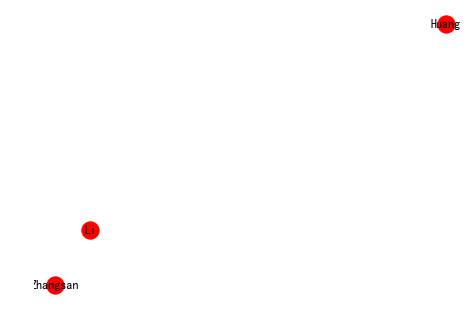

In [65]:
nx.draw(simple_graph, locations, with_labels=True)

In [164]:
city_graph = nx.Graph(city_connection)

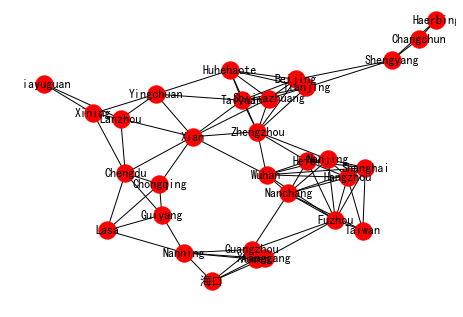

In [166]:
nx.draw(city_graph, city_location, with_labels=True)

## 五子棋 --> 
## 象棋

## 从郑州到嘉峪关为例

## 广度优先搜索

In [252]:
def bfs(graph, start, destination):   
#    need_visit = [start]    
    pathes = [[start]]
    
    seen = set()
    
    visited_cities = []
    
#    while need_visit:
    while pathes:
        path = pathes.pop(0)
        
#        froniter = need_visit.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
        
        for successor in graph[froniter]:
            if successor in path: continue
            
            new_path = path + [successor]
            
            if successor == destination: # 找到目的地的时候
                visited_cities.append(froniter)
                visited_cities.append(successor)
                return new_path, visited_cities, pathes # 返回了
                
            pathes.append(new_path)
        
        seen.add(froniter)
        
        visited_cities.append(froniter)
    
    return seen, visited_cities, pathes
            

In [291]:
def best_fs(graph, start, destination, strategy):   
#    need_visit = [start]    
    pathes = [[start]]
    
    seen = set()
    
    visited_cities = []
    
#    while need_visit:
    while pathes:
        path = pathes.pop(0)
        
#        froniter = need_visit.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
        
        for successor in graph[froniter]:
            if successor in path: continue
            
            new_path = path + [successor]
            
            if successor == destination: # 找到目的地的时候
                visited_cities.append(froniter)
                visited_cities.append(successor)
                return new_path, visited_cities, pathes # 返回了
                
            pathes.append(new_path)
        
        seen.add(froniter)
        
        visited_cities.append(froniter)
        
        pathes = sorted(pathes, key=strategy)
    
    return seen, visited_cities, pathes
            

In [292]:
p, v, ps = best_fs(city_graph, 'Haerbing', 'Hefei', get_total_length)

In [293]:
pretty_print(p)

Haerbing🚘->Shengyang🚘->Tianjing🚘->Zhengzhou🚘->Hefei


In [300]:
p, v, ps = best_fs(city_graph, 'Haerbing', 'Hefei', lambda x: -len(x))

In [301]:
pretty_print(p)
get_total_length(p)

Haerbing🚘->Shengyang🚘->Beijing🚘->Shijiazhuang🚘->Zhengzhou🚘->Hefei


2236.9751148272708

In [296]:
p, v, ps = bfs(city_graph, 'Haerbing', 'Hefei')

pretty_print(p)

get_total_length(p)

Haerbing🚘->Shengyang🚘->Beijing🚘->Zhengzhou🚘->Hefei


2219.9781106961673

In [281]:
def pretty_print(cities):
    print('🚘->'.join(cities))

In [283]:
p, v, ps = bfs(city_graph, 'Haerbing', 'Hefei')

pretty_print(p)

def get_total_length(path):
    distance = 0 
    for i, city in enumerate(path[:-1]):
        current, next_c = city, path[i+1]
        distance += get_city_distance(current, next_c)
    
    return distance

Haerbing🚘->Shengyang🚘->Beijing🚘->Zhengzhou🚘->Hefei


In [255]:
depth_first_search(city_graph, 'Beijing', 'Hefei')

(['Beijing',
  'Huhehaote',
  'Yingchuan',
  'Xian',
  'Chongqing',
  'Guiyang',
  'Nanning',
  'Aomen',
  'Xianggang',
  '海口',
  'Guangzhou',
  'Fuzhou',
  'Hefei'],
 ['Beijing',
  'Huhehaote',
  'Yingchuan',
  'Xian',
  'Chongqing',
  'Guiyang',
  'Nanning',
  'Aomen',
  'Xianggang',
  '海口',
  'Guangzhou',
  'Fuzhou',
  'Hefei'],
 [['Beijing', 'Shijiazhuang'],
  ['Beijing', 'Zhengzhou'],
  ['Beijing', 'Shengyang'],
  ['Beijing', 'Taiyuan'],
  ['Beijing', 'Tianjing'],
  ['Beijing', 'Huhehaote', 'Shijiazhuang'],
  ['Beijing', 'Huhehaote', 'Zhengzhou'],
  ['Beijing', 'Huhehaote', 'Taiyuan'],
  ['Beijing', 'Huhehaote', 'Tianjing'],
  ['Beijing', 'Huhehaote', 'Yingchuan', 'Lanzhou'],
  ['Beijing', 'Huhehaote', 'Yingchuan', 'Xining'],
  ['Beijing', 'Huhehaote', 'Yingchuan', 'Taiyuan'],
  ['Beijing', 'Huhehaote', 'Yingchuan', 'Xian', 'Lanzhou'],
  ['Beijing', 'Huhehaote', 'Yingchuan', 'Xian', 'Chengdu'],
  ['Beijing', 'Huhehaote', 'Yingchuan', 'Xian', 'Shijiazhuang'],
  ['Beijing', 'Huhehao

## 深度优先算法

In [246]:
def depth_first_search(graph, start, destination):   
#    need_visit = [start]    
    pathes = [[start]]
    
    seen = set()
    
    visited_cities = []
    
#    while need_visit:
    while pathes:
  #      path = pathes.pop(0) # 把以前的老路先走完
        path = pathes.pop(-1) # 取最新的路径
        
#        froniter = need_visit.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
        
        for successor in graph[froniter]:
            if successor in path: continue
            
            new_path = path + [successor]
            
            if successor == destination: # 找到目的地的时候
                visited_cities.append(froniter)
                visited_cities.append(successor)
                return new_path, visited_cities, pathes # 返回了
                
            pathes.append(new_path)
        
        seen.add(froniter)
        
        visited_cities.append(froniter)
    
    return seen, visited_cities, pathes
            

In [206]:
path, visited_cities, pathes = search(city_connection, 'Zhengzhou', 'Jiayuguan')

In [204]:
path

['Zhengzhou', 'Xian', 'Lanzhou', 'Jiayuguan']

In [207]:
pathes

[['Zhengzhou', 'Xian', 'Chengdu'],
 ['Zhengzhou', 'Xian', 'Shijiazhuang'],
 ['Zhengzhou', 'Xian', 'Wuhan'],
 ['Zhengzhou', 'Xian', 'Taiyuan'],
 ['Zhengzhou', 'Xian', 'Chongqing'],
 ['Zhengzhou', 'Xian', 'Yingchuan'],
 ['Zhengzhou', 'Beijing', 'Shijiazhuang'],
 ['Zhengzhou', 'Beijing', 'Shengyang'],
 ['Zhengzhou', 'Beijing', 'Taiyuan'],
 ['Zhengzhou', 'Beijing', 'Tianjing'],
 ['Zhengzhou', 'Beijing', 'Huhehaote'],
 ['Zhengzhou', 'Tianjing', 'Shijiazhuang'],
 ['Zhengzhou', 'Tianjing', 'Shengyang'],
 ['Zhengzhou', 'Tianjing', 'Taiyuan'],
 ['Zhengzhou', 'Tianjing', 'Beijing'],
 ['Zhengzhou', 'Tianjing', 'Huhehaote'],
 ['Zhengzhou', 'Huhehaote', 'Shijiazhuang'],
 ['Zhengzhou', 'Huhehaote', 'Taiyuan'],
 ['Zhengzhou', 'Huhehaote', 'Beijing'],
 ['Zhengzhou', 'Huhehaote', 'Tianjing'],
 ['Zhengzhou', 'Huhehaote', 'Yingchuan'],
 ['Zhengzhou', 'Wuhan', 'Hangzhou', 'Nanjing'],
 ['Zhengzhou', 'Wuhan', 'Hangzhou', 'Hefei'],
 ['Zhengzhou', 'Wuhan', 'Hangzhou', 'Nanchang'],
 ['Zhengzhou', 'Wuhan', 'Han

In [187]:
color_map = ['green' for _ in city_graph]

In [221]:
def visited_procedure(graph, postion, visited_order, step):

    changed = visited_order[:step] if step else visited_order
    
    color_map = ['green' if c in changed else 'red' for c in graph]
    
    nx.draw(graph, postion, node_color=color_map, with_labels=True)

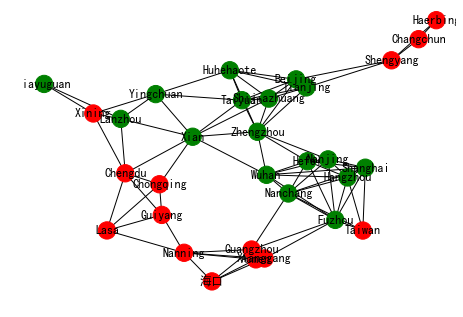

In [240]:
path, visited_cities_bfs, pathes = search(city_connection, 'Zhengzhou', 'Jiayuguan')
visited_procedure(city_graph, city_location, visited_cities_bfs, step=20)

In [247]:
path, visited_cities_dfs, pathes = depth_first_search(city_connection, 'Zhengzhou', 'Jiayuguan')

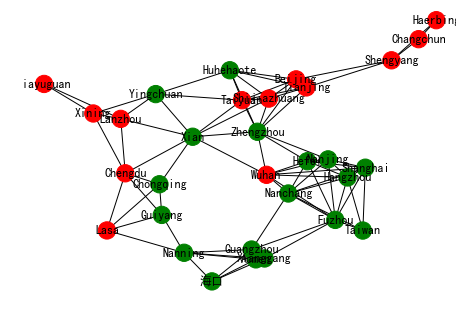

In [250]:
visited_procedure(city_graph, city_location, visited_cities_dfs, step=18)

In [249]:
path

['Zhengzhou',
 'Huhehaote',
 'Yingchuan',
 'Xian',
 'Chongqing',
 'Guiyang',
 'Nanning',
 'Lasa',
 'Chengdu',
 'Xining',
 'Jiayuguan']

## 找到了从郑州到嘉峪关的路

In [223]:
path, visited_cities, pathes = search(city_connection, 'Zhengzhou', 'Jiayuguan')

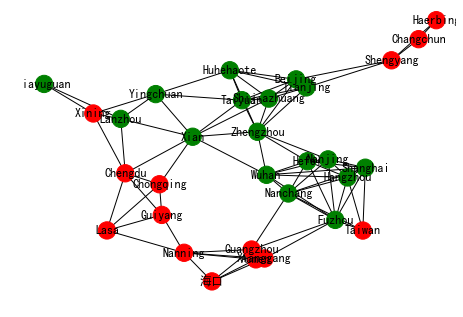

In [224]:
visited_procedure(city_graph, city_location, visited_cities, step=None)

## 爬虫、搜索引擎与BFS，DFS的关系

## 如果你要做一个爬虫程序，你应该用BFS还是DFS？

In [304]:
import requests

https://github.com/Autobicycle-Never-Blocking/Beloved-Little-Moto/blob/master/crawl.py

## 作业：从https://ditie.mapbar.com/beijing/开始
+ 爬虫
+ 正则表达式
+ 数据预处理 
+ BFS
+ Best-First-Search 
-> 实现北京地铁的换乘方案

In [317]:
url = 'https://ditie.mapbar.com/beijing/'

In [318]:
response = requests.get(url)

In [325]:
pattern = """<a href="(http://ditie\.mapbar\.com/beijing/\w+/)" style="background-color:#\w+" target="_blank">(\w+)</a>"""

In [326]:
re.findall(pattern, response.text)

[('http://ditie.mapbar.com/beijing/line_ditiebatongxian/', '地铁八通线'),
 ('http://ditie.mapbar.com/beijing/line_ditiechangpingxian/', '地铁昌平线'),
 ('http://ditie.mapbar.com/beijing/line_ditiefangshanxian/', '地铁房山线'),
 ('http://ditie.mapbar.com/beijing/line_ditieyizhuangxian/', '地铁亦庄线'),
 ('http://ditie.mapbar.com/beijing/line_jichangkuaigui/', '机场快轨'),
 ('http://ditie.mapbar.com/beijing/line_ditie1haoxian/', '地铁1号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie2haoxian/', '地铁2号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie4haoxiandaxingxian/', '地铁4号线大兴线'),
 ('http://ditie.mapbar.com/beijing/line_ditie5haoxian/', '地铁5号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie6haoxian/', '地铁6号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie7haoxian/', '地铁7号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie8haoxian/', '地铁8号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie9haoxian/', '地铁9号线'),
 ('http://ditie.mapbar.com/beijing/line_ditie10haoxian/', '地铁10号线'),
 ('http://ditie.mapbar.com/beiji

In [344]:
a_station = 'https://ditie.mapbar.com/beijing/line_ditiebatongxian/'

In [352]:
response = requests.get(a_station)

In [372]:
pattern_s = '<li\s*.*><a class="cl\-station" href="http://ditie\.mapbar\.com/beijing/station_\w+/" target="_blank" title="\w+">(\w+)</a></li>'

In [373]:
re.findall(pattern_s, response.text)

['四惠站',
 '四惠东站',
 '高碑店站',
 '传媒大学站',
 '双桥站',
 '管庄站',
 '八里桥站',
 '通州北苑站',
 '果园站',
 '九棵树站',
 '梨园站',
 '临河里站',
 '土桥站']

In [ ]:
{
    '八通线'：[],
    '一号线'：[],
}